[[98  2]
 [40 11]]
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       100
           1       0.85      0.22      0.34        51

    accuracy                           0.72       151
   macro avg       0.78      0.60      0.58       151
weighted avg       0.76      0.72      0.66       151

0.7966666666666666


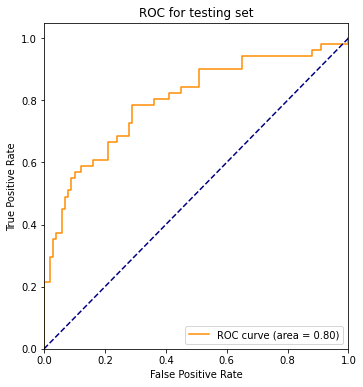

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, roc_curve

class LeastSquare():
    def __init__(self, train_address = '../data/pca_train.csv', test_address = '../data/pca_test.csv'):
        self.train_address = train_address
        self.test_address = test_address
        self.dataLoad()

    def dataLoad(self):
        self.origin_train = pd.read_csv(self.train_address)
        self.origin_test = pd.read_csv(self.test_address)

    def classOneHot(self, label_arr):
        """
        Transform label array into matrix. The size is n*k, k is the number of classes
        This is one-hot transformation
        """
        n_class = np.unique(label_arr).size
        y_matrix = np.zeros((label_arr.shape[0],n_class))
        y_matrix[label_arr==0,0] = 1
        y_matrix[label_arr==1,1] = 1
        return y_matrix.T

    def leastSquare(self, lam = 0):
        training_set = self.origin_train
        testing_set = self.origin_test
        y_vec = training_set['class']
        x_matrix = training_set.drop(['class'], axis = 1)
        # x_matrix = x_matrix.apply(lambda t:((t - np.mean(t)) / np.std(t)))
        x_matrix['one'] = 1
        y_vec = self.classOneHot(y_vec)
        x_matrix = np.array(x_matrix)
        x_matrix = x_matrix.T
        part1 = np.dot(y_vec, x_matrix.T)
        part2 = np.linalg.inv(np.dot(x_matrix, x_matrix.T)+
                                lam * np.diag(np.ones(len(training_set.T))))
        self.beta_hat = np.dot(part1, part2)
        test_data = testing_set.drop(['class'], axis = 1)
        # test_data = test_data.apply(lambda t:((t - np.mean(t)) / np.std(t)))

        test_data['one'] = 1
        self.y_pred = np.dot(self.beta_hat, test_data.T)

    def testResult(self): 
        test = self.origin_test
        prediction = self.y_pred
        prediction_df= pd.DataFrame(prediction.T)
        prediction_df["predict"] = 0
        prediction_df.loc[prediction_df[1] > prediction_df[0], "predict"] = 1
        target_names = ['class 1', 'class 2']
        self.result_report = classification_report(test['class'], prediction_df['predict'], target_names=target_names)
        self.confu_matrix = confusion_matrix(test['class'], prediction_df['predict'])
        test_auc = roc_auc_score(test['class'], prediction_df[1])
        print(confusion_matrix(test['class'], prediction_df['predict']))
        print(classification_report(test['class'], prediction_df['predict']))
        print(roc_auc_score(test['class'], prediction_df[1]))
    
        score = prediction_df[1]
        test_y = self.origin_test['class']
        auc = roc_auc_score(test_y, score)
        fpr, tpr, _ = roc_curve(test_y, score)
        plt.figure(figsize=(12, 6))
        plt.subplot(121)
        plt.plot(fpr, tpr, color='darkorange',
                label='ROC curve (area = %0.2f)' % test_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC for testing set')
        plt.legend(loc="lower right")

if __name__=="__main__":
    p = LeastSquare()
    p.leastSquare(lam=0)
    p.testResult()
